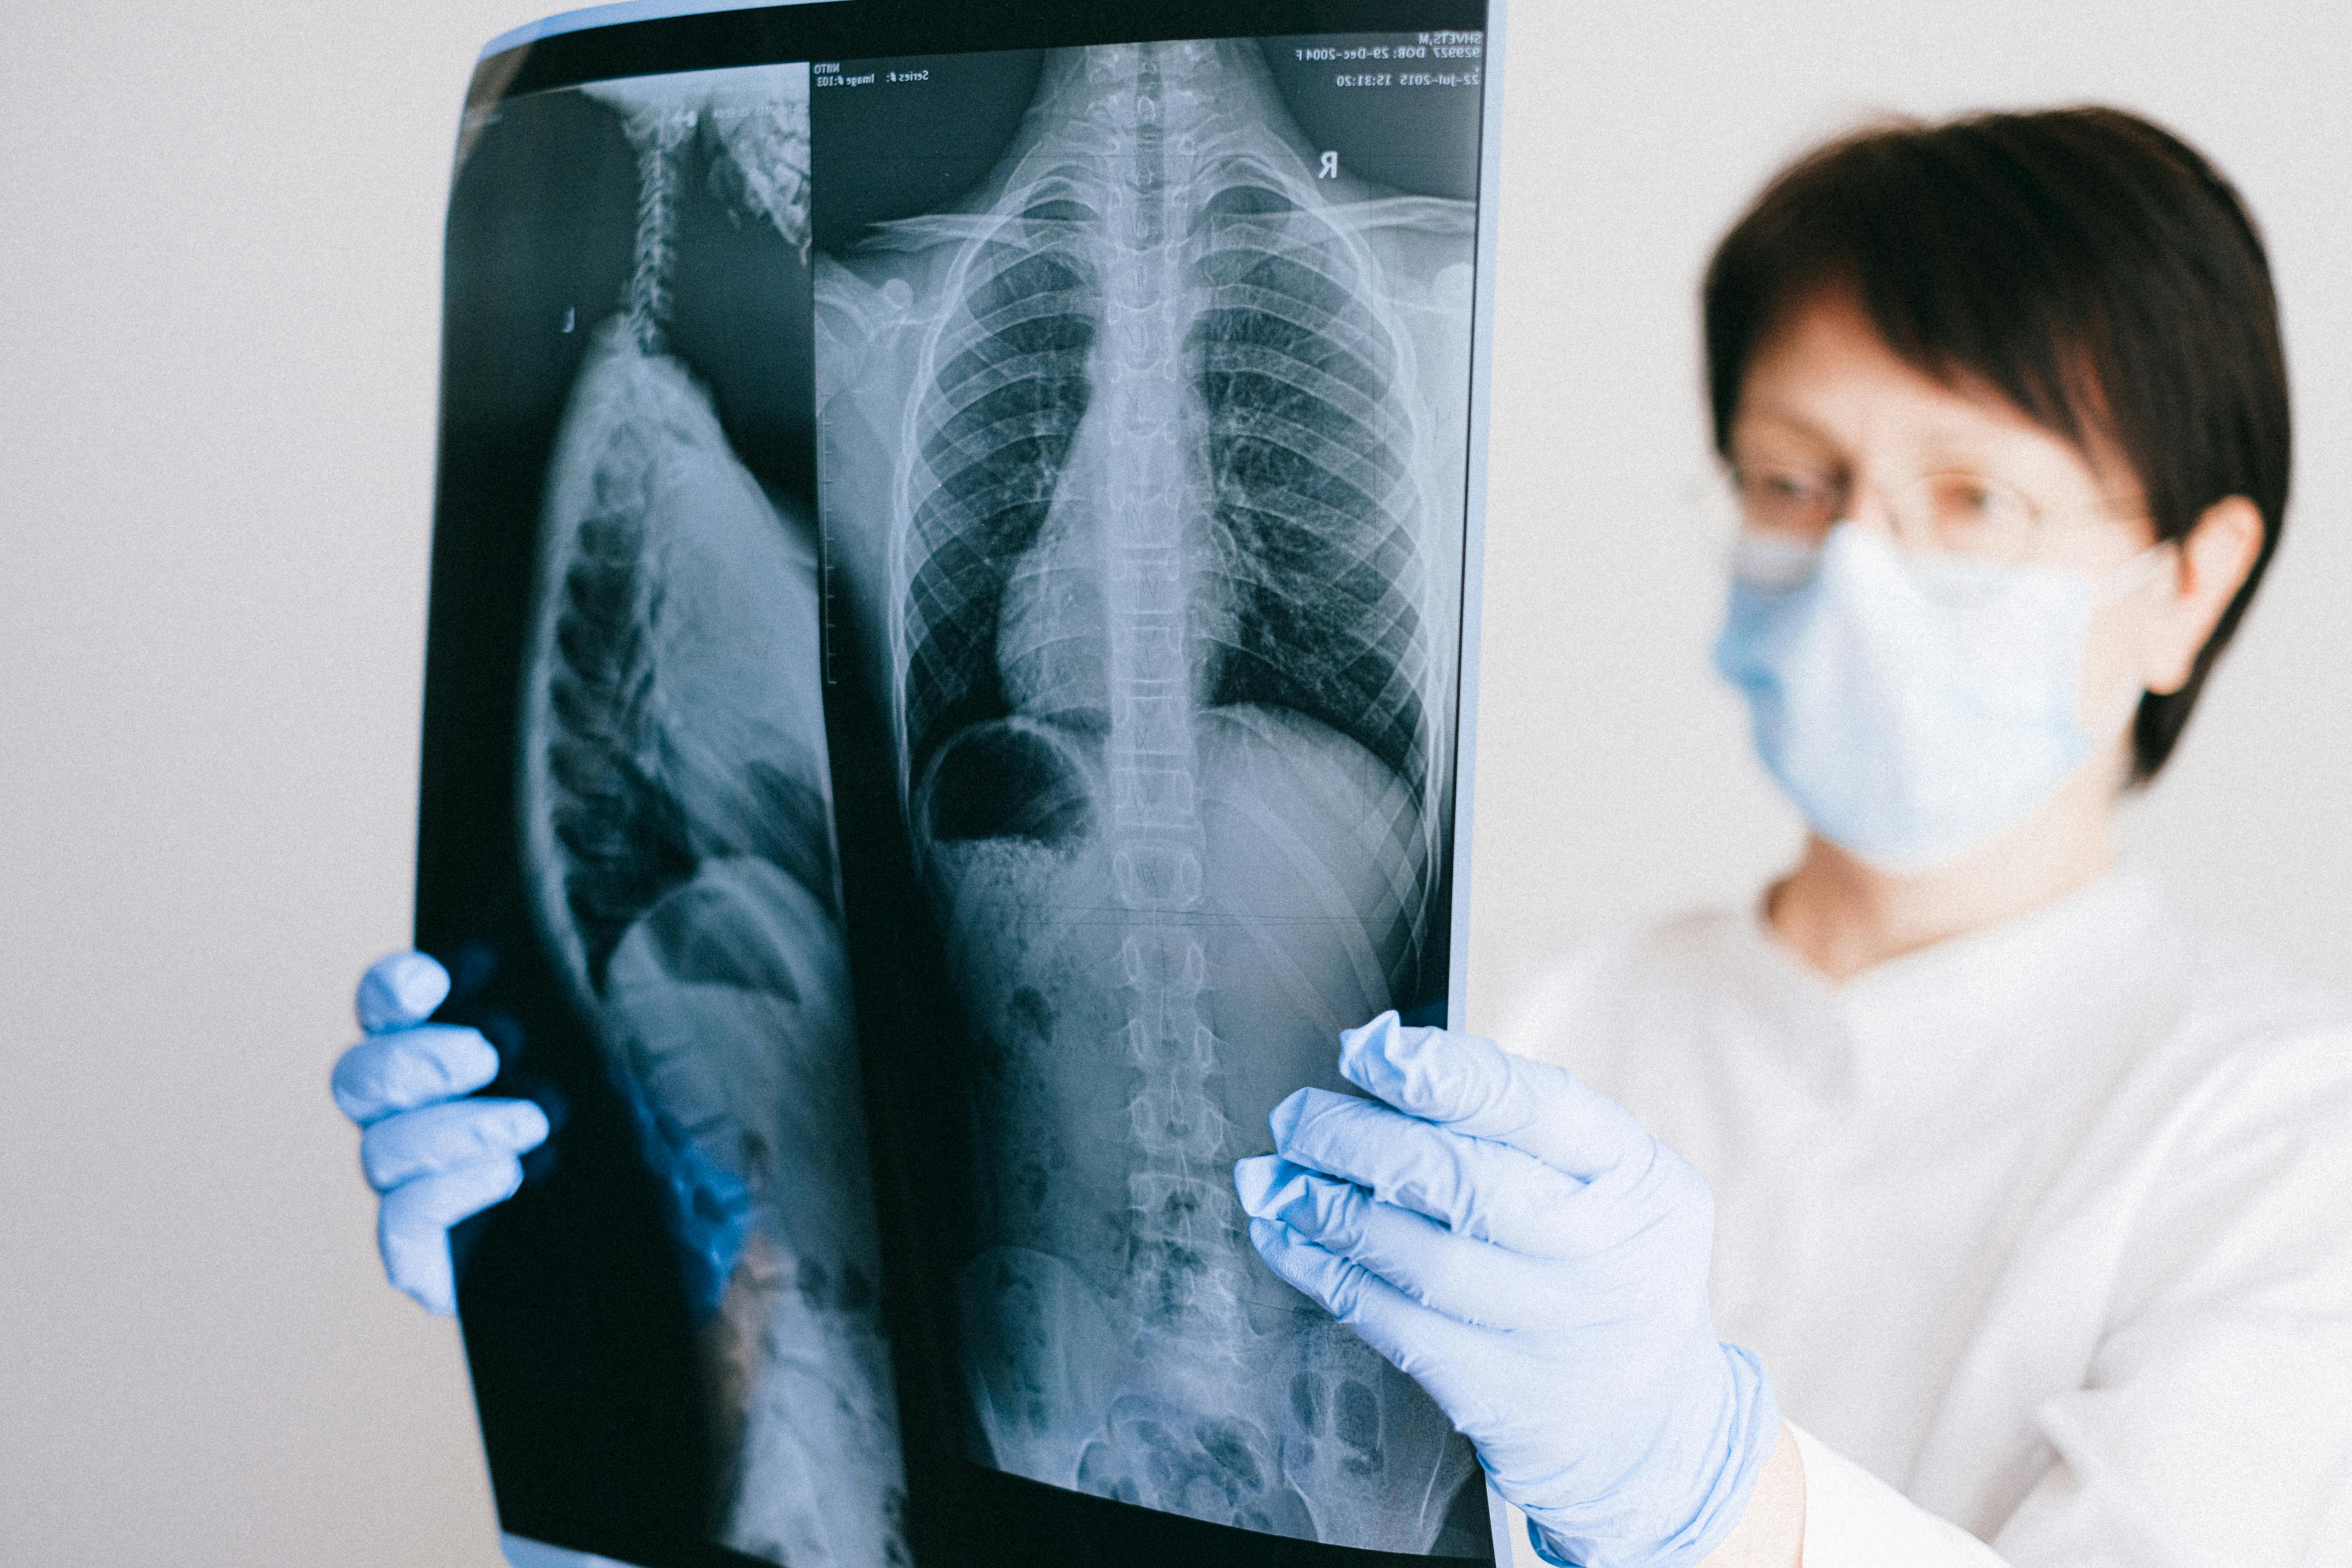

**AI DRIVEN MEDICAL IMAGING DIAGNOSIS OF PNEUMONIA**

As a part of my tenure as an Artificial Intelligence Intern at Code Clause from May 2024 till June 2024, I utilized a dataset from Med MNIST to detect the presence or absence of Pneumonia based on chest X-rays.
Pneumonia is a serious disease that causes inflammation in one or both lungs.
Using the images obtained from Med MNIST, I followed the steps mentioned below to determine the presence of pneumonia:
1. Data Loading
2. Splitting of Data
3. Data Cleaning
4. Data Visualization
5. Defining functions for model creation
6. Model Building
7. Model Evaluation
8. Prediction using the best model
9. Model Deployment

Each image is in grayscale and is of the size 28 x 28 pixels.

I have created the models using:

1. Simple Neural Network
2. Convolution Neural Network

DATA LOADING

In [274]:
import tensorflow as tf


In [275]:
from tensorflow import keras

In [276]:
import keras.layers

In [277]:
from PIL import Image

In [278]:
import numpy as np

In [279]:
pip install tensorflow medmnist

In [280]:
import medmnist
from medmnist import PneumoniaMNIST

SPLITTING OF DATA

In [281]:
train_data=PneumoniaMNIST(split="train",download=True)
test_data=PneumoniaMNIST(split="test",download=True)

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


In [282]:
x_train=train_data.imgs
y_train=train_data.labels
x_test=test_data.imgs
y_test=test_data.labels

In [283]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=uint8)

The labels for the images are 0 and 1.

O indicates absence of pneumonia.

1 indicates presence of pneumonia.

In [284]:
x_train.shape

(4708, 28, 28)

In [285]:
x_test.shape

(624, 28, 28)

DATA CLEANING

In [286]:
x_train=x_train/255.0
x_test=x_test/255.0

DATA VISUALIZATION

In [287]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, '[1]')

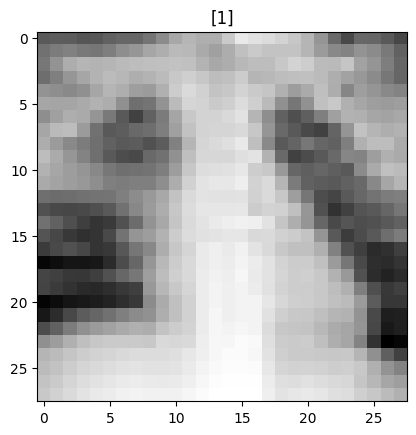

In [288]:
plt.imshow(x_train[1],cmap="gray")
plt.title(y_train[1])

Text(0.5, 1.0, '[0]')

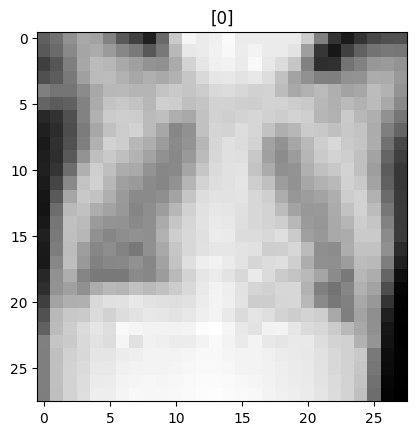

In [289]:
plt.imshow(x_train[20],cmap="gray")
plt.title(y_train[20])

DEFINING FUNCTIONS FOR MODEL CREATION

I have created 13 functions consisting of Simple Neural Networks and Convolution Neural Network . The functions are as follows:

1. **two_layers_softmax:** The simple neural network only has the input and output layers. The output layer uses the softmax activation function.

2.  **two_layers_sigmoid: ** The simple neural network only has the input and output layers. The output layer uses the sigmoid activation function.


3. **three_layers_softmax:** The simple neural network has 3 layers; input, hidden and output layer. The output layer uses the SoftMax activation function.


4. **three_layers_sigmoid:** The simple neural network has 3 layers; input, hidden and output layer. The output layer uses the sigmoid activation function.


5. **four_layer_softmax:** The simple neural network has 4 layers; 1 input layer, 2 hidden layers and 1 output layer. The output layer uses the softmax activation function.

6. **three_layer_softmax_SGD:**The simple neural network has 3 layers; input, hidden and output layer. The output layer uses the SoftMax activation function. The optimizer used is SGD (Stochastic Gradient Descent)

7. **four_layer_sigmoid:**The simple neural network has 4 layers; 1 input layer, 2 hidden layers and 1 output layer. The output layer uses the sigmoid activation function.

8. **five_layer_cnn_softmax:** The convolution network consists of 5 layers, 1 for convolution, 1 for max pooling, 1 for input layer, 1 for hidden layer and 1 for output layer. The output layer uses SoftMax activation function.

9. **five_layer_cnn_sigmoid:** The convolution network consists of 5 layers, 1 for convolution, 1 for max pooling, 1 for input layer, 1 for hidden layer and 1 for output layer. The output layer uses sigmoid activation function.

10. **seven_layer_cnn_softmax:** The convolution network consists of 7 layers, 2 for convolution, 2 for max pooling, 1 for input layer, 1 for hidden layer and 1 for output layer. The output layer uses softmax activation function.

11. **seven_layer_cnn_sigmoid:** The convolution network consists of 7 layers, 2 for convolution, 2 for max pooling, 1 for input layer, 1 for hidden layer and 1 for output layer. The output layer uses sigmoid activation function.

12. **five_layer_cnn_softmax_avg_pooling :** The convolution network consists of 5 layers, 1 for convolution, 1 for average pooling, 1 for input layer, 1 for hidden layer and 1 for output layer. The output layer uses SoftMax activation function.

13. **seven_layer_cnn_softmax_avg_pooling**:The convolution network consists of 7 layers, 2 for convolution, 2 for average pooling, 1 for input layer, 1 for hidden layer and 1 for output layer. The output layer uses softmax activation function.



In [290]:
def two_layers_softmax():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(2,activation='softmax')
        ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )
  return model

In [291]:
def two_layers_sigmoid():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(2,activation="sigmoid")
  ])
  model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [292]:
def three_layers_softmax():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(256,activation='relu'),
      keras.layers.Dense(2,activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [293]:
def three_layers_sigmoid():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(256,activation='relu'),
      keras.layers.Dense(2,activation='sigmoid')
  ])
  model.compile(optimizer='adam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [294]:
def four_layer_softmax():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(256,activation='relu'),
      keras.layers.Dense(128,activation='relu'),
      keras.layers.Dense(2,activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [295]:
def three_layer_softmax_SGD():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(256,activation='relu'),
      keras.layers.Dense(2,activation='softmax')
  ])
  model.compile(optimizer='SGD',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [296]:
def four_layer_sigmoid():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(256,activation='relu'),
      keras.layers.Dense(128,activation='relu'),
      keras.layers.Dense(2,activation='sigmoid')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [297]:
def five_layer_cnn_softmax():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
      ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [298]:
def five_layer_cnn_sigmoid():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
      ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [299]:
def seven_layer_cnn_softmax():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
      ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [300]:
def seven_layer_cnn_sigmoid():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
      ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [301]:
def five_layer_cnn_softmax_avg_pooling():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
      ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [302]:
def seven_layer_cnn_softmax_avg_pooling():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu'),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
      ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

MODEL BUILDING

Using the 13 functions listed above, I created 36 models by varying the epochs to find the model achieving the highest accuracy.

Model 1

In [303]:
model1=two_layers_softmax()
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8231
Epoch 2/5
148/148 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9021
Epoch 3/5
148/148 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9182
Epoch 4/5
148/148 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9293
Epoch 5/5
148/148 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9305


Model 2

In [304]:
model2=two_layers_sigmoid()
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 1s 2ms/step - loss: 0.4850 - accuracy: 0.7768
Epoch 2/5
148/148 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8895
Epoch 3/5
148/148 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.9110
Epoch 4/5
148/148 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9184
Epoch 5/5
148/148 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9229


Model 3

In [305]:
model3=three_layers_softmax()
model3.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 1s 5ms/step - loss: 0.3151 - accuracy: 0.8692
Epoch 2/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1910 - accuracy: 0.9214
Epoch 3/5
148/148 [==============================] - 1s 5ms/step - loss: 0.2153 - accuracy: 0.9116
Epoch 4/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1506 - accuracy: 0.9410
Epoch 5/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1498 - accuracy: 0.9401


Model 4

In [306]:
model4=three_layers_softmax()
model4.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 2s 9ms/step - loss: 0.4385 - accuracy: 0.8309
Epoch 2/10
148/148 [==============================] - 1s 9ms/step - loss: 0.2019 - accuracy: 0.9208
Epoch 3/10
148/148 [==============================] - 1s 7ms/step - loss: 0.1743 - accuracy: 0.9293
Epoch 4/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1657 - accuracy: 0.9354
Epoch 5/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1590 - accuracy: 0.9376
Epoch 6/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1460 - accuracy: 0.9403
Epoch 7/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1631 - accuracy: 0.9333
Epoch 8/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1340 - accuracy: 0.9499
Epoch 9/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1287 - accuracy: 0.9497
Epoch 10/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1409 - accuracy: 0.9444

Model 5

In [307]:
model5=three_layers_softmax()
model5.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 1s 5ms/step - loss: 0.3254 - accuracy: 0.8647
Epoch 2/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1936 - accuracy: 0.9182
Epoch 3/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1637 - accuracy: 0.9325
Epoch 4/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1709 - accuracy: 0.9305
Epoch 5/15
148/148 [==============================] - 1s 7ms/step - loss: 0.1781 - accuracy: 0.9325
Epoch 6/15
148/148 [==============================] - 1s 8ms/step - loss: 0.1809 - accuracy: 0.9254
Epoch 7/15
148/148 [==============================] - 1s 8ms/step - loss: 0.1348 - accuracy: 0.9477
Epoch 8/15
148/148 [==============================] - 1s 9ms/step - loss: 0.1382 - accuracy: 0.9482
Epoch 9/15
148/148 [==============================] - 1s 7ms/step - loss: 0.1318 - accuracy: 0.9486
Epoch 10/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1443 - accuracy: 0.9418

Model 6

In [308]:
model6=three_layers_sigmoid()
model6.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 2s 6ms/step - loss: 0.3327 - accuracy: 0.8596
Epoch 2/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1854 - accuracy: 0.9250
Epoch 3/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1869 - accuracy: 0.9227
Epoch 4/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1609 - accuracy: 0.9407
Epoch 5/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1461 - accuracy: 0.9410


Model 7

In [309]:
model7=three_layers_sigmoid()
model7.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 2s 6ms/step - loss: 0.3036 - accuracy: 0.8764
Epoch 2/10
148/148 [==============================] - 1s 9ms/step - loss: 0.2007 - accuracy: 0.9174
Epoch 3/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1670 - accuracy: 0.9339
Epoch 4/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1580 - accuracy: 0.9388
Epoch 5/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1597 - accuracy: 0.9316
Epoch 6/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1511 - accuracy: 0.9446
Epoch 7/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1536 - accuracy: 0.9384
Epoch 8/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1385 - accuracy: 0.9482
Epoch 9/10
148/148 [==============================] - 1s 7ms/step - loss: 0.1404 - accuracy: 0.9427
Epoch 10/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1409 - accuracy: 0.942

Model 8

In [310]:
model8=three_layers_sigmoid()
model8.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 2s 9ms/step - loss: 0.3195 - accuracy: 0.8660
Epoch 2/15
148/148 [==============================] - 1s 8ms/step - loss: 0.1851 - accuracy: 0.9312
Epoch 3/15
148/148 [==============================] - 1s 9ms/step - loss: 0.1703 - accuracy: 0.9303
Epoch 4/15
148/148 [==============================] - 1s 8ms/step - loss: 0.1641 - accuracy: 0.9356
Epoch 5/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1541 - accuracy: 0.9365
Epoch 6/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1692 - accuracy: 0.9297
Epoch 7/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1395 - accuracy: 0.9448
Epoch 8/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1328 - accuracy: 0.9477
Epoch 9/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1312 - accuracy: 0.9480
Epoch 10/15
148/148 [==============================] - 1s 5ms/step - loss: 0.1455 - accuracy: 0.9424

Model 9

In [311]:
model9=four_layer_softmax()
model9.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 2s 6ms/step - loss: 0.3055 - accuracy: 0.8672
Epoch 2/5
148/148 [==============================] - 1s 6ms/step - loss: 0.2024 - accuracy: 0.9174
Epoch 3/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1663 - accuracy: 0.9318
Epoch 4/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1716 - accuracy: 0.9305
Epoch 5/5
148/148 [==============================] - 1s 5ms/step - loss: 0.1584 - accuracy: 0.9388


Model 10

In [312]:
model10=four_layer_softmax()
model10.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 2s 6ms/step - loss: 0.3056 - accuracy: 0.8685
Epoch 2/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1812 - accuracy: 0.9271
Epoch 3/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1952 - accuracy: 0.9220
Epoch 4/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1698 - accuracy: 0.9322
Epoch 5/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1695 - accuracy: 0.9316
Epoch 6/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1503 - accuracy: 0.9435
Epoch 7/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1421 - accuracy: 0.9437
Epoch 8/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1438 - accuracy: 0.9446
Epoch 9/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1408 - accuracy: 0.9458
Epoch 10/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1667 - accuracy: 0.93

Model 11

In [313]:
model11=four_layer_softmax()
model11.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 2s 6ms/step - loss: 0.2957 - accuracy: 0.8743
Epoch 2/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1953 - accuracy: 0.9180
Epoch 3/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1750 - accuracy: 0.9305
Epoch 4/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1751 - accuracy: 0.9303
Epoch 5/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1640 - accuracy: 0.9344
Epoch 6/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1466 - accuracy: 0.9416
Epoch 7/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1345 - accuracy: 0.9456
Epoch 8/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1507 - accuracy: 0.9441
Epoch 9/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1363 - accuracy: 0.9460
Epoch 10/15
148/148 [==============================] - 1s 10ms/step - loss: 0.1413 - accuracy: 0.945

Model 12

In [314]:
model12=three_layer_softmax_SGD()
model12.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 1s 4ms/step - loss: 0.3864 - accuracy: 0.8271
Epoch 2/5
148/148 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.8949
Epoch 3/5
148/148 [==============================] - 1s 4ms/step - loss: 0.2224 - accuracy: 0.9125
Epoch 4/5
148/148 [==============================] - 1s 4ms/step - loss: 0.1984 - accuracy: 0.9197
Epoch 5/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1903 - accuracy: 0.9269


Model 13

In [315]:
model13=three_layer_softmax_SGD()
model13.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 1s 6ms/step - loss: 0.3923 - accuracy: 0.8318
Epoch 2/10
148/148 [==============================] - 1s 6ms/step - loss: 0.2639 - accuracy: 0.9012
Epoch 3/10
148/148 [==============================] - 1s 6ms/step - loss: 0.2237 - accuracy: 0.9112
Epoch 4/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1988 - accuracy: 0.9225
Epoch 5/10
148/148 [==============================] - 1s 4ms/step - loss: 0.1836 - accuracy: 0.9286
Epoch 6/10
148/148 [==============================] - 1s 4ms/step - loss: 0.1730 - accuracy: 0.9322
Epoch 7/10
148/148 [==============================] - 1s 4ms/step - loss: 0.1736 - accuracy: 0.9286
Epoch 8/10
148/148 [==============================] - 1s 4ms/step - loss: 0.1639 - accuracy: 0.9344
Epoch 9/10
148/148 [==============================] - 1s 4ms/step - loss: 0.1628 - accuracy: 0.9384
Epoch 10/10
148/148 [==============================] - 1s 4ms/step - loss: 0.1504 - accuracy: 0.9405

Model 14

In [316]:
model14=three_layer_softmax_SGD()
model14.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 1s 4ms/step - loss: 0.4009 - accuracy: 0.8307
Epoch 2/15
148/148 [==============================] - 1s 4ms/step - loss: 0.2615 - accuracy: 0.9031
Epoch 3/15
148/148 [==============================] - 1s 4ms/step - loss: 0.2212 - accuracy: 0.9150
Epoch 4/15
148/148 [==============================] - 1s 4ms/step - loss: 0.2025 - accuracy: 0.9197
Epoch 5/15
148/148 [==============================] - 1s 4ms/step - loss: 0.1869 - accuracy: 0.9284
Epoch 6/15
148/148 [==============================] - 1s 4ms/step - loss: 0.1760 - accuracy: 0.9301
Epoch 7/15
148/148 [==============================] - 1s 4ms/step - loss: 0.1679 - accuracy: 0.9363
Epoch 8/15
148/148 [==============================] - 1s 4ms/step - loss: 0.1647 - accuracy: 0.9361
Epoch 9/15
148/148 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9346
Epoch 10/15
148/148 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.9365

Model 15

In [317]:
model15=four_layer_sigmoid()
model15.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 2s 6ms/step - loss: 0.3402 - accuracy: 0.8562
Epoch 2/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1792 - accuracy: 0.9274
Epoch 3/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1729 - accuracy: 0.9291
Epoch 4/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1515 - accuracy: 0.9401
Epoch 5/5
148/148 [==============================] - 1s 6ms/step - loss: 0.1761 - accuracy: 0.9339


Model 16

In [318]:
model16=four_layer_sigmoid()
model16.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 2s 6ms/step - loss: 0.3246 - accuracy: 0.8564
Epoch 2/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1961 - accuracy: 0.9214
Epoch 3/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1743 - accuracy: 0.9305
Epoch 4/10
148/148 [==============================] - 1s 5ms/step - loss: 0.1551 - accuracy: 0.9378
Epoch 5/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1460 - accuracy: 0.9401
Epoch 6/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1576 - accuracy: 0.9371
Epoch 7/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1521 - accuracy: 0.9382
Epoch 8/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1442 - accuracy: 0.9422
Epoch 9/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1406 - accuracy: 0.9471
Epoch 10/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1346 - accuracy: 0.94

Model 17

In [319]:
model17=four_layer_sigmoid()
model17.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 2s 6ms/step - loss: 0.3050 - accuracy: 0.8706
Epoch 2/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1784 - accuracy: 0.9305
Epoch 3/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1686 - accuracy: 0.9331
Epoch 4/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1623 - accuracy: 0.9352
Epoch 5/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1616 - accuracy: 0.9369
Epoch 6/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1494 - accuracy: 0.9420
Epoch 7/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1521 - accuracy: 0.9382
Epoch 8/15
148/148 [==============================] - 1s 6ms/step - loss: 0.1408 - accuracy: 0.9460
Epoch 9/15
148/148 [==============================] - 1s 8ms/step - loss: 0.1397 - accuracy: 0.9463
Epoch 10/15
148/148 [==============================] - 1s 10ms/step - loss: 0.1505 - accuracy: 0.944

Model 18

In [320]:
model18=five_layer_cnn_softmax()
model18.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 4s 20ms/step - loss: 0.2821 - accuracy: 0.8791
Epoch 2/5
148/148 [==============================] - 3s 20ms/step - loss: 0.1557 - accuracy: 0.9395
Epoch 3/5
148/148 [==============================] - 5s 33ms/step - loss: 0.1212 - accuracy: 0.9528
Epoch 4/5
148/148 [==============================] - 4s 25ms/step - loss: 0.1104 - accuracy: 0.9586
Epoch 5/5
148/148 [==============================] - 3s 20ms/step - loss: 0.1044 - accuracy: 0.9588


Model 19

In [321]:
model19=five_layer_cnn_softmax()
model19.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 5s 28ms/step - loss: 0.2954 - accuracy: 0.8726
Epoch 2/10
148/148 [==============================] - 4s 28ms/step - loss: 0.1536 - accuracy: 0.9378
Epoch 3/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1225 - accuracy: 0.9541
Epoch 4/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1120 - accuracy: 0.9594
Epoch 5/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1016 - accuracy: 0.9616
Epoch 6/10
148/148 [==============================] - 5s 32ms/step - loss: 0.0936 - accuracy: 0.9662
Epoch 7/10
148/148 [==============================] - 3s 23ms/step - loss: 0.0957 - accuracy: 0.9660
Epoch 8/10
148/148 [==============================] - 3s 20ms/step - loss: 0.0842 - accuracy: 0.9703
Epoch 9/10
148/148 [==============================] - 3s 19ms/step - loss: 0.0790 - accuracy: 0.9696
Epoch 10/10
148/148 [==============================] - 4s 24ms/step - loss: 0.0709 - accura

Model 20

In [322]:
model20=five_layer_cnn_softmax()
model20.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 4s 20ms/step - loss: 0.2828 - accuracy: 0.8760
Epoch 2/15
148/148 [==============================] - 4s 24ms/step - loss: 0.1366 - accuracy: 0.9480
Epoch 3/15
148/148 [==============================] - 5s 31ms/step - loss: 0.1163 - accuracy: 0.9552
Epoch 4/15
148/148 [==============================] - 4s 30ms/step - loss: 0.1066 - accuracy: 0.9620
Epoch 5/15
148/148 [==============================] - 4s 26ms/step - loss: 0.0987 - accuracy: 0.9641
Epoch 6/15
148/148 [==============================] - 4s 28ms/step - loss: 0.0925 - accuracy: 0.9664
Epoch 7/15
148/148 [==============================] - 4s 28ms/step - loss: 0.0886 - accuracy: 0.9675
Epoch 8/15
148/148 [==============================] - 3s 19ms/step - loss: 0.0834 - accuracy: 0.9677
Epoch 9/15
148/148 [==============================] - 3s 19ms/step - loss: 0.0753 - accuracy: 0.9711
Epoch 10/15
148/148 [==============================] - 3s 19ms/step - loss: 0.0692 - accura

Model 21

In [323]:
model21=five_layer_cnn_softmax()
model21.fit(x_train,y_train,epochs=25)

Epoch 1/25
148/148 [==============================] - 5s 29ms/step - loss: 0.3070 - accuracy: 0.8621
Epoch 2/25
148/148 [==============================] - 3s 19ms/step - loss: 0.1668 - accuracy: 0.9284
Epoch 3/25
148/148 [==============================] - 3s 19ms/step - loss: 0.1410 - accuracy: 0.9441
Epoch 4/25
148/148 [==============================] - 3s 19ms/step - loss: 0.1215 - accuracy: 0.9543
Epoch 5/25
148/148 [==============================] - 4s 30ms/step - loss: 0.1174 - accuracy: 0.9569
Epoch 6/25
148/148 [==============================] - 4s 26ms/step - loss: 0.1017 - accuracy: 0.9613
Epoch 7/25
148/148 [==============================] - 3s 19ms/step - loss: 0.0926 - accuracy: 0.9639
Epoch 8/25
148/148 [==============================] - 3s 19ms/step - loss: 0.0860 - accuracy: 0.9707
Epoch 9/25
148/148 [==============================] - 3s 20ms/step - loss: 0.0869 - accuracy: 0.9705
Epoch 10/25
148/148 [==============================] - 5s 32ms/step - loss: 0.0804 - accura

Model 22

In [324]:
model22=five_layer_cnn_sigmoid()
model22.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 4s 19ms/step - loss: 0.2859 - accuracy: 0.8787
Epoch 2/5
148/148 [==============================] - 4s 30ms/step - loss: 0.1585 - accuracy: 0.9386
Epoch 3/5
148/148 [==============================] - 4s 26ms/step - loss: 0.1376 - accuracy: 0.9469
Epoch 4/5
148/148 [==============================] - 3s 19ms/step - loss: 0.1226 - accuracy: 0.9535
Epoch 5/5
148/148 [==============================] - 3s 19ms/step - loss: 0.1137 - accuracy: 0.9552


Model 23

In [325]:
model23=five_layer_cnn_sigmoid()
model23.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 6s 30ms/step - loss: 0.2920 - accuracy: 0.8791
Epoch 2/10
148/148 [==============================] - 3s 21ms/step - loss: 0.1531 - accuracy: 0.9393
Epoch 3/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1365 - accuracy: 0.9456
Epoch 4/10
148/148 [==============================] - 3s 23ms/step - loss: 0.1160 - accuracy: 0.9573
Epoch 5/10
148/148 [==============================] - 6s 39ms/step - loss: 0.1066 - accuracy: 0.9588
Epoch 6/10
148/148 [==============================] - 5s 31ms/step - loss: 0.0999 - accuracy: 0.9628
Epoch 7/10
148/148 [==============================] - 3s 20ms/step - loss: 0.0998 - accuracy: 0.9635
Epoch 8/10
148/148 [==============================] - 3s 20ms/step - loss: 0.0856 - accuracy: 0.9660
Epoch 9/10
148/148 [==============================] - 4s 25ms/step - loss: 0.0745 - accuracy: 0.9718
Epoch 10/10
148/148 [==============================] - 4s 30ms/step - loss: 0.0768 - accura

Model 24

In [326]:
model24=five_layer_cnn_sigmoid()
model24.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 4s 20ms/step - loss: 0.2676 - accuracy: 0.8921
Epoch 2/15
148/148 [==============================] - 3s 20ms/step - loss: 0.1384 - accuracy: 0.9448
Epoch 3/15
148/148 [==============================] - 3s 24ms/step - loss: 0.1193 - accuracy: 0.9550
Epoch 4/15
148/148 [==============================] - 5s 33ms/step - loss: 0.1098 - accuracy: 0.9569
Epoch 5/15
148/148 [==============================] - 3s 19ms/step - loss: 0.0930 - accuracy: 0.9643
Epoch 6/15
148/148 [==============================] - 3s 19ms/step - loss: 0.0885 - accuracy: 0.9688
Epoch 7/15
148/148 [==============================] - 3s 20ms/step - loss: 0.0824 - accuracy: 0.9694
Epoch 8/15
148/148 [==============================] - 4s 26ms/step - loss: 0.0927 - accuracy: 0.9645
Epoch 9/15
148/148 [==============================] - 4s 30ms/step - loss: 0.0745 - accuracy: 0.9728
Epoch 10/15
148/148 [==============================] - 3s 19ms/step - loss: 0.0684 - accura

Model 25

In [327]:
model25=seven_layer_cnn_softmax()
model25.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 5s 23ms/step - loss: 0.3383 - accuracy: 0.8520
Epoch 2/5
148/148 [==============================] - 5s 34ms/step - loss: 0.1737 - accuracy: 0.9303
Epoch 3/5
148/148 [==============================] - 4s 27ms/step - loss: 0.1456 - accuracy: 0.9424
Epoch 4/5
148/148 [==============================] - 3s 23ms/step - loss: 0.1301 - accuracy: 0.9473
Epoch 5/5
148/148 [==============================] - 3s 22ms/step - loss: 0.1191 - accuracy: 0.9548


Model 26

In [328]:
model26=seven_layer_cnn_softmax()
model26.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 7s 25ms/step - loss: 0.3772 - accuracy: 0.8297
Epoch 2/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1881 - accuracy: 0.9206
Epoch 3/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1607 - accuracy: 0.9354
Epoch 4/10
148/148 [==============================] - 5s 32ms/step - loss: 0.1454 - accuracy: 0.9431
Epoch 5/10
148/148 [==============================] - 4s 29ms/step - loss: 0.1383 - accuracy: 0.9488
Epoch 6/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1336 - accuracy: 0.9460
Epoch 7/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1267 - accuracy: 0.9514
Epoch 8/10
148/148 [==============================] - 4s 29ms/step - loss: 0.1154 - accuracy: 0.9552
Epoch 9/10
148/148 [==============================] - 5s 31ms/step - loss: 0.0997 - accuracy: 0.9630
Epoch 10/10
148/148 [==============================] - 3s 22ms/step - loss: 0.0940 - accura

Model 27

In [329]:
model27=seven_layer_cnn_softmax()
model27.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 5s 30ms/step - loss: 0.3610 - accuracy: 0.8339
Epoch 2/15
148/148 [==============================] - 4s 29ms/step - loss: 0.1813 - accuracy: 0.9250
Epoch 3/15
148/148 [==============================] - 3s 21ms/step - loss: 0.1547 - accuracy: 0.9378
Epoch 4/15
148/148 [==============================] - 3s 22ms/step - loss: 0.1368 - accuracy: 0.9475
Epoch 5/15
148/148 [==============================] - 4s 27ms/step - loss: 0.1220 - accuracy: 0.9514
Epoch 6/15
148/148 [==============================] - 5s 33ms/step - loss: 0.1177 - accuracy: 0.9550
Epoch 7/15
148/148 [==============================] - 3s 22ms/step - loss: 0.1115 - accuracy: 0.9573
Epoch 8/15
148/148 [==============================] - 3s 22ms/step - loss: 0.1038 - accuracy: 0.9601
Epoch 9/15
148/148 [==============================] - 4s 25ms/step - loss: 0.1012 - accuracy: 0.9616
Epoch 10/15
148/148 [==============================] - 5s 35ms/step - loss: 0.0933 - accura

Model 28

In [330]:
model28=seven_layer_cnn_sigmoid()
model28.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 4s 21ms/step - loss: 0.3284 - accuracy: 0.8524
Epoch 2/5
148/148 [==============================] - 4s 24ms/step - loss: 0.1774 - accuracy: 0.9297
Epoch 3/5
148/148 [==============================] - 5s 36ms/step - loss: 0.1515 - accuracy: 0.9429
Epoch 4/5
148/148 [==============================] - 3s 21ms/step - loss: 0.1355 - accuracy: 0.9446
Epoch 5/5
148/148 [==============================] - 3s 21ms/step - loss: 0.1262 - accuracy: 0.9526


Model 29

In [331]:
model29=seven_layer_cnn_sigmoid()
model29.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 7s 37ms/step - loss: 0.3401 - accuracy: 0.8435
Epoch 2/10
148/148 [==============================] - 3s 23ms/step - loss: 0.1728 - accuracy: 0.9288
Epoch 3/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1521 - accuracy: 0.9416
Epoch 4/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1368 - accuracy: 0.9458
Epoch 5/10
148/148 [==============================] - 5s 33ms/step - loss: 0.1285 - accuracy: 0.9490
Epoch 6/10
148/148 [==============================] - 4s 27ms/step - loss: 0.1278 - accuracy: 0.9528
Epoch 7/10
148/148 [==============================] - 3s 21ms/step - loss: 0.1156 - accuracy: 0.9565
Epoch 8/10
148/148 [==============================] - 3s 21ms/step - loss: 0.1016 - accuracy: 0.9616
Epoch 9/10
148/148 [==============================] - 4s 28ms/step - loss: 0.0940 - accuracy: 0.9643
Epoch 10/10
148/148 [==============================] - 5s 31ms/step - loss: 0.0953 - accura

Model 30

In [332]:
model30=seven_layer_cnn_sigmoid()
model30.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 4s 22ms/step - loss: 0.3532 - accuracy: 0.8466
Epoch 2/15
148/148 [==============================] - 4s 24ms/step - loss: 0.1738 - accuracy: 0.9297
Epoch 3/15
148/148 [==============================] - 5s 35ms/step - loss: 0.1578 - accuracy: 0.9369
Epoch 4/15
148/148 [==============================] - 3s 22ms/step - loss: 0.1404 - accuracy: 0.9439
Epoch 5/15
148/148 [==============================] - 3s 21ms/step - loss: 0.1275 - accuracy: 0.9503
Epoch 6/15
148/148 [==============================] - 3s 21ms/step - loss: 0.1168 - accuracy: 0.9548
Epoch 7/15
148/148 [==============================] - 6s 38ms/step - loss: 0.1158 - accuracy: 0.9556
Epoch 8/15
148/148 [==============================] - 3s 23ms/step - loss: 0.1116 - accuracy: 0.9545
Epoch 9/15
148/148 [==============================] - 3s 22ms/step - loss: 0.1003 - accuracy: 0.9626
Epoch 10/15
148/148 [==============================] - 3s 22ms/step - loss: 0.0971 - accura

Model 31

In [333]:
model31=five_layer_cnn_softmax_avg_pooling()
model31.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 6s 29ms/step - loss: 0.2834 - accuracy: 0.8796
Epoch 2/5
148/148 [==============================] - 3s 18ms/step - loss: 0.1704 - accuracy: 0.9337
Epoch 3/5
148/148 [==============================] - 3s 18ms/step - loss: 0.1406 - accuracy: 0.9456
Epoch 4/5
148/148 [==============================] - 3s 19ms/step - loss: 0.1254 - accuracy: 0.9509
Epoch 5/5
148/148 [==============================] - 3s 24ms/step - loss: 0.1217 - accuracy: 0.9537


Model 32

In [334]:
model32=five_layer_cnn_softmax_avg_pooling()
model32.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 4s 18ms/step - loss: 0.2981 - accuracy: 0.8709
Epoch 2/10
148/148 [==============================] - 3s 17ms/step - loss: 0.1633 - accuracy: 0.9365
Epoch 3/10
148/148 [==============================] - 4s 24ms/step - loss: 0.1402 - accuracy: 0.9467
Epoch 4/10
148/148 [==============================] - 4s 27ms/step - loss: 0.1236 - accuracy: 0.9543
Epoch 5/10
148/148 [==============================] - 3s 17ms/step - loss: 0.1124 - accuracy: 0.9577
Epoch 6/10
148/148 [==============================] - 3s 17ms/step - loss: 0.1164 - accuracy: 0.9590
Epoch 7/10
148/148 [==============================] - 2s 17ms/step - loss: 0.0979 - accuracy: 0.9637
Epoch 8/10
148/148 [==============================] - 3s 18ms/step - loss: 0.0977 - accuracy: 0.9620
Epoch 9/10
148/148 [==============================] - 4s 29ms/step - loss: 0.0970 - accuracy: 0.9658
Epoch 10/10
148/148 [==============================] - 3s 21ms/step - loss: 0.0949 - accura

Model 33

In [335]:
model33=five_layer_cnn_softmax_avg_pooling()
model33.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 4s 18ms/step - loss: 0.3453 - accuracy: 0.8524
Epoch 2/15
148/148 [==============================] - 3s 17ms/step - loss: 0.1742 - accuracy: 0.9305
Epoch 3/15
148/148 [==============================] - 3s 17ms/step - loss: 0.1453 - accuracy: 0.9439
Epoch 4/15
148/148 [==============================] - 3s 20ms/step - loss: 0.1304 - accuracy: 0.9507
Epoch 5/15
148/148 [==============================] - 4s 29ms/step - loss: 0.1273 - accuracy: 0.9520
Epoch 6/15
148/148 [==============================] - 3s 19ms/step - loss: 0.1217 - accuracy: 0.9535
Epoch 7/15
148/148 [==============================] - 2s 17ms/step - loss: 0.1107 - accuracy: 0.9571
Epoch 8/15
148/148 [==============================] - 3s 17ms/step - loss: 0.1055 - accuracy: 0.9630
Epoch 9/15
148/148 [==============================] - 3s 17ms/step - loss: 0.1012 - accuracy: 0.9643
Epoch 10/15
148/148 [==============================] - 4s 30ms/step - loss: 0.1105 - accura

Model 34

In [336]:
model34=seven_layer_cnn_softmax_avg_pooling()
model34.fit(x_train,y_train,epochs=5)

Epoch 1/5
148/148 [==============================] - 6s 32ms/step - loss: 0.2969 - accuracy: 0.8679
Epoch 2/5
148/148 [==============================] - 3s 19ms/step - loss: 0.1711 - accuracy: 0.9299
Epoch 3/5
148/148 [==============================] - 3s 19ms/step - loss: 0.1652 - accuracy: 0.9342
Epoch 4/5
148/148 [==============================] - 3s 19ms/step - loss: 0.1543 - accuracy: 0.9405
Epoch 5/5
148/148 [==============================] - 4s 24ms/step - loss: 0.1452 - accuracy: 0.9424


Model 35

In [337]:
model35=seven_layer_cnn_softmax_avg_pooling()
model35.fit(x_train,y_train,epochs=10)

Epoch 1/10
148/148 [==============================] - 5s 23ms/step - loss: 0.3494 - accuracy: 0.8415
Epoch 2/10
148/148 [==============================] - 3s 18ms/step - loss: 0.1843 - accuracy: 0.9284
Epoch 3/10
148/148 [==============================] - 3s 19ms/step - loss: 0.1628 - accuracy: 0.9367
Epoch 4/10
148/148 [==============================] - 3s 20ms/step - loss: 0.1501 - accuracy: 0.9414
Epoch 5/10
148/148 [==============================] - 5s 32ms/step - loss: 0.1495 - accuracy: 0.9418
Epoch 6/10
148/148 [==============================] - 3s 21ms/step - loss: 0.1374 - accuracy: 0.9469
Epoch 7/10
148/148 [==============================] - 3s 19ms/step - loss: 0.1381 - accuracy: 0.9465
Epoch 8/10
148/148 [==============================] - 3s 19ms/step - loss: 0.1302 - accuracy: 0.9490
Epoch 9/10
148/148 [==============================] - 3s 22ms/step - loss: 0.1311 - accuracy: 0.9520
Epoch 10/10
148/148 [==============================] - 5s 32ms/step - loss: 0.1195 - accura

Model 36

In [338]:
model36=seven_layer_cnn_softmax_avg_pooling()
model36.fit(x_train,y_train,epochs=15)

Epoch 1/15
148/148 [==============================] - 4s 18ms/step - loss: 0.3252 - accuracy: 0.8511
Epoch 2/15
148/148 [==============================] - 3s 18ms/step - loss: 0.1779 - accuracy: 0.9271
Epoch 3/15
148/148 [==============================] - 3s 18ms/step - loss: 0.1636 - accuracy: 0.9369
Epoch 4/15
148/148 [==============================] - 4s 29ms/step - loss: 0.1592 - accuracy: 0.9382
Epoch 5/15
148/148 [==============================] - 4s 25ms/step - loss: 0.1521 - accuracy: 0.9431
Epoch 6/15
148/148 [==============================] - 3s 19ms/step - loss: 0.1371 - accuracy: 0.9467
Epoch 7/15
148/148 [==============================] - 3s 19ms/step - loss: 0.1332 - accuracy: 0.9511
Epoch 8/15
148/148 [==============================] - 3s 19ms/step - loss: 0.1322 - accuracy: 0.9497
Epoch 9/15
148/148 [==============================] - 5s 31ms/step - loss: 0.1254 - accuracy: 0.9518
Epoch 10/15
148/148 [==============================] - 3s 23ms/step - loss: 0.1249 - accura

MODEL EVALUATION

In [339]:
print("MODEL NO       LOSS          ACCURACY")
print("    1           {}             {}".format(model1.evaluate(x_test, y_test)[0], model1.evaluate(x_test, y_test)[1]))
print("    2           {}             {}".format(model2.evaluate(x_test, y_test)[0], model2.evaluate(x_test, y_test)[1]))
print("    3           {}             {}".format(model3.evaluate(x_test, y_test)[0], model3.evaluate(x_test, y_test)[1]))
print("    4           {}             {}".format(model4.evaluate(x_test, y_test)[0], model4.evaluate(x_test, y_test)[1]))
print("    5           {}             {}".format(model5.evaluate(x_test, y_test)[0], model5.evaluate(x_test, y_test)[1]))
print("    6           {}             {}".format(model6.evaluate(x_test, y_test)[0], model6.evaluate(x_test, y_test)[1]))
print("    7           {}             {}".format(model7.evaluate(x_test, y_test)[0], model7.evaluate(x_test, y_test)[1]))
print("    8           {}             {}".format(model8.evaluate(x_test, y_test)[0], model8.evaluate(x_test, y_test)[1]))
print("    9           {}             {}".format(model9.evaluate(x_test, y_test)[0], model9.evaluate(x_test, y_test)[1]))
print("    10           {}             {}".format(model10.evaluate(x_test, y_test)[0], model10.evaluate(x_test, y_test)[1]))
print("    11           {}             {}".format(model11.evaluate(x_test, y_test)[0], model11.evaluate(x_test, y_test)[1]))
print("    12           {}             {}".format(model12.evaluate(x_test, y_test)[0], model12.evaluate(x_test, y_test)[1]))
print("    13           {}             {}".format(model13.evaluate(x_test, y_test)[0], model13.evaluate(x_test, y_test)[1]))
print("    14           {}             {}".format(model14.evaluate(x_test, y_test)[0], model14.evaluate(x_test, y_test)[1]))
print("    15           {}             {}".format(model15.evaluate(x_test, y_test)[0], model15.evaluate(x_test, y_test)[1]))
print("    16           {}             {}".format(model16.evaluate(x_test, y_test)[0], model16.evaluate(x_test, y_test)[1]))
print("    17           {}             {}".format(model17.evaluate(x_test, y_test)[0], model17.evaluate(x_test, y_test)[1]))
print("    18           {}             {}".format(model18.evaluate(x_test, y_test)[0], model18.evaluate(x_test, y_test)[1]))
print("    19           {}             {}".format(model19.evaluate(x_test, y_test)[0], model19.evaluate(x_test, y_test)[1]))
print("    20           {}             {}".format(model20.evaluate(x_test, y_test)[0], model20.evaluate(x_test, y_test)[1]))
print("    21           {}             {}".format(model21.evaluate(x_test, y_test)[0], model21.evaluate(x_test, y_test)[1]))
print("    22           {}             {}".format(model22.evaluate(x_test, y_test)[0], model22.evaluate(x_test, y_test)[1]))
print("    23           {}             {}".format(model23.evaluate(x_test, y_test)[0], model23.evaluate(x_test, y_test)[1]))
print("    24           {}             {}".format(model24.evaluate(x_test, y_test)[0], model24.evaluate(x_test, y_test)[1]))
print("    25           {}             {}".format(model25.evaluate(x_test, y_test)[0], model25.evaluate(x_test, y_test)[1]))
print("    26           {}             {}".format(model26.evaluate(x_test, y_test)[0], model26.evaluate(x_test, y_test)[1]))
print("    27           {}             {}".format(model27.evaluate(x_test, y_test)[0], model27.evaluate(x_test, y_test)[1]))
print("    28           {}             {}".format(model28.evaluate(x_test, y_test)[0], model28.evaluate(x_test, y_test)[1]))
print("    29           {}             {}".format(model29.evaluate(x_test, y_test)[0], model29.evaluate(x_test, y_test)[1]))
print("    30           {}             {}".format(model30.evaluate(x_test, y_test)[0], model30.evaluate(x_test, y_test)[1]))
print("    31           {}             {}".format(model31.evaluate(x_test, y_test)[0], model31.evaluate(x_test, y_test)[1]))
print("    32           {}             {}".format(model32.evaluate(x_test, y_test)[0], model32.evaluate(x_test, y_test)[1]))
print("    33           {}             {}".format(model33.evaluate(x_test, y_test)[0], model33.evaluate(x_test, y_test)[1]))
print("    34           {}             {}".format(model34.evaluate(x_test, y_test)[0], model34.evaluate(x_test, y_test)[1]))
print("    35           {}             {}".format(model35.evaluate(x_test, y_test)[0], model35.evaluate(x_test, y_test)[1]))
print("    36           {}             {}".format(model36.evaluate(x_test, y_test)[0], model36.evaluate(x_test, y_test)[1]))


MODEL NO       LOSS          ACCURACY
20/20 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8141
    1           0.4522746503353119             0.8141025900840759
20/20 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8526
    2           0.36713725328445435             0.8525640964508057
20/20 [==============================] - 0s 6ms/step - loss: 0.7729 - accuracy: 0.7837
    3           0.7729019522666931             0.7836538553237915
20/20 [==============================] - 0s 5ms/step - loss: 0.5052 - accuracy: 0.8478
    4           0.5051903128623962             0.8477563858032227
20/20 [==============================] - 0s 5ms/step - loss: 0.5088 - accuracy: 0.8510
    5           0.5088055729866028             0.8509615659713745
20/20 [==============================] - 0s 6ms/step - loss: 1.2252 - accuracy: 0.6971
    6           1.225231647491455             0.6971153616905212
20/20 [==============================] - 0s 

Model 20 is performing the best as its accuracy is 89.58% which is the highest among all the models created.

In [340]:
model=model20

PREDICTIONS USING THE MODEL

I created the following functions to ease out the process of prediction:
1. **image_preprocess** : in case the user provides an input that is not of 28x28 pixels then it resizes the image, converts it to grayscale and normalizes the image.
2. **predict**: it invokes the previous function, expands the dimensions of the image and returns the predicted class to the caller.

I have given some custom inputs from my side to check the performance of the model.

In [341]:
def image_preprocess(image_path):
  img=Image.open(image_path).convert('L')
  img=img.resize((28,28))
  img=np.array(img)
  img=img/255.0
  return img

In [342]:
def predict(image_path):
  img=image_preprocess(image_path)
  img=np.expand_dims(img,axis=0)
  pred=model.predict(img)
  pred_class=np.argmax(pred[0])
  if pred_class==0:
    return "Absence of Pneumonia"
  else:
    return "Presence of Pneumonia"

In [343]:
#custom inputs from PC
img1="normal1.jpeg"
img2="normal2.jpeg"
img3="pneumonia1.jpeg"
img4="pneumonia2.jpeg"

pred_class1=predict(img1)
pred_class2=predict(img2)
pred_class3=predict(img3)
pred_class4=predict(img4)
print("1. Actual: Normal Predicted:{}".format(pred_class1))
print("2. Actual: Normal Predicted:{}".format(pred_class2))
print("3. Actual:Pneumonia Predicted:{}".format(pred_class3))
print("4. Actual: Pneumonia Predicted:{}".format(pred_class4))

1/1 [==============================] - 0s 22ms/step
1. Actual: Normal Predicted:Absence of Pneumonia
2. Actual: Normal Predicted:Absence of Pneumonia
3. Actual:Pneumonia Predicted:Presence of Pneumonia
4. Actual: Pneumonia Predicted:Presence of Pneumonia


Model Deployment

In [344]:
!pip install gradio

In [345]:
import gradio as gr

In [346]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="filepath"),
    outputs=gr.Label(num_top_classes=2),
    title="AI Driven Medical Diagnosis of Pneumonia",
    description="Please Upload a Chest X Ray"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8a241e81afa8d203ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
